## Experimento para ver el efecto de una capa POOL 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [8]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


**Para realizar una comparación justa se buscar que luego de la etapa convolucional salgan imagenes de las mismas dimensiones. Tambien es importante para mantener la misma cantidad de parametros a entrenar**

In [9]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [10]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 12s 14ms/step - loss: 0.8402 - accuracy: 0.7157 - val_loss: 0.6156 - val_accuracy: 0.7510
Epoch 2/3
860/860 [==============================] - 14s 16ms/step - loss: 0.5341 - accuracy: 0.8066 - val_loss: 0.6188 - val_accuracy: 0.7734
Epoch 3/3
860/860 [==============================] - 16s 18ms/step - loss: 0.4779 - accuracy: 0.8294 - val_loss: 0.4797 - val_accuracy: 0.8252


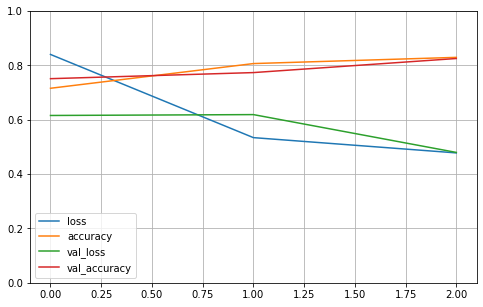

In [13]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5410 - accuracy: 0.7927


In [15]:
X_new = X_test[:3]

In [16]:
y_pred = model_a.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [17]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


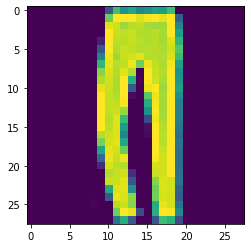

In [18]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [19]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 11s 12ms/step - loss: 0.8996 - accuracy: 0.7116 - val_loss: 0.6165 - val_accuracy: 0.7560
Epoch 2/3
860/860 [==============================] - 8s 10ms/step - loss: 0.5342 - accuracy: 0.8074 - val_loss: 0.5520 - val_accuracy: 0.7858
Epoch 3/3
860/860 [==============================] - 8s 9ms/step - loss: 0.4797 - accuracy: 0.8270 - val_loss: 0.4726 - val_accuracy: 0.8274


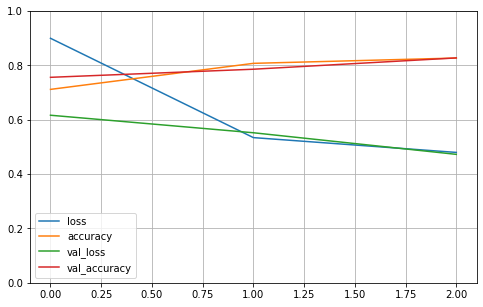

In [21]:
pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.8045


In [22]:
y_pred_b = model_b.predict_classes(X_new)
y_pred_b

array([7, 2, 1], dtype=int64)

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

**Tarea:** agregar uno o dos bloques más con y sin pool para ver si hay diferencia.

In [75]:
model_c = keras.models.Sequential()
model_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_c.add(keras.layers.MaxPooling2D((2, 2)))
model_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(14, 14, 1)))
model_c.add(keras.layers.MaxPooling2D((2, 2)))
model_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(7, 7, 1)))
model_c.add(keras.layers.MaxPooling2D((2, 2)))
model_c.add(keras.layers.Flatten())
model_c.add(keras.layers.Dense(300, activation="relu"))
model_c.add(keras.layers.Dense(100, activation="relu"))
model_c.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_d = keras.models.Sequential()
model_d.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_d.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(13, 13, 1)))
model_d.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='same', activation='relu', input_shape=(6, 6, 1)))
model_d.add(keras.layers.Flatten())
model_d.add(keras.layers.Dense(300, activation="relu"))
model_d.add(keras.layers.Dense(100, activation="relu"))
model_d.add(keras.layers.Dense(10, activation="softmax"))

In [76]:
model_c.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 288)             

In [77]:
model_d.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_26 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 300)               86700     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_80 (Dense)             (None, 10)              

In [78]:
model_c.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_d.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [79]:
model_history_c = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 12s 14ms/step - loss: 0.2373 - accuracy: 0.9129 - val_loss: 0.2820 - val_accuracy: 0.8960
Epoch 2/3
860/860 [==============================] - 12s 14ms/step - loss: 0.2317 - accuracy: 0.9154 - val_loss: 0.2682 - val_accuracy: 0.9030
Epoch 3/3
860/860 [==============================] - 12s 14ms/step - loss: 0.2271 - accuracy: 0.9171 - val_loss: 0.2993 - val_accuracy: 0.8936


In [80]:
model_history_d = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 13s 15ms/step - loss: 0.2244 - accuracy: 0.9170 - val_loss: 0.2786 - val_accuracy: 0.8994
Epoch 2/3
860/860 [==============================] - 13s 15ms/step - loss: 0.2193 - accuracy: 0.9196 - val_loss: 0.2888 - val_accuracy: 0.8940
Epoch 3/3
860/860 [==============================] - 13s 15ms/step - loss: 0.2155 - accuracy: 0.9203 - val_loss: 0.2692 - val_accuracy: 0.9014


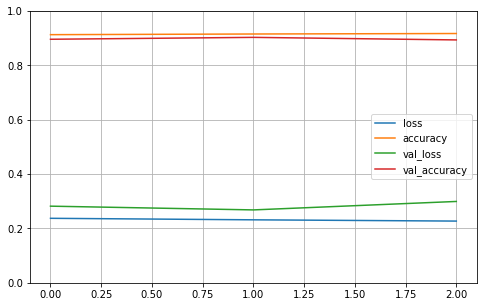

In [81]:
pd.DataFrame(model_history_c.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

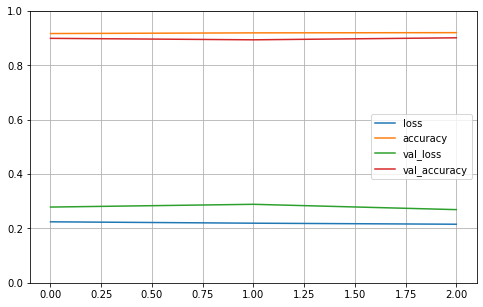

In [82]:
pd.DataFrame(model_history_d.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()